In [2]:
import rlds_dataloader.dataloader as rlds_data_loader



# default is mean/std action-proprio normalization. Actions only first 6 dimensions normalized
dataloader_config = {
    "data_root_dir": "/raid/users/yajatyadav/datasets/raw_libero/raw_libero_RLDS/",
    "dataset_mix": { 
        "libero_90__black_bowl_on_plate_kitchen_scene1": 1.0, # weights are in terms of odds
    },
    "batch_size": 2,

    "num_workers": 4, # dataloader workers
    "seed": 42,
    "do_image_aug": True, # check file for sequence: dict(
    "binarize_gripper": True, # binarizes to 0 and 1 (by scanning for transitions), and then normalizes to -1 and 1
    "train": True, # for picking the right split
    "balance_datasets": True,
}


dataloader = rlds_data_loader.create_data_loader(
    dataloader_config,
    skip_norm_stats=True,
)


2025-10-14 17:06:51.359917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760486811.378589  573574 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760486811.384328  573574 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760486811.399233  573574 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760486811.399249  573574 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760486811.399250  573574 computation_placer.cc:177] computation placer alr

😍😍 Balancing datasets...

######################################################################################
# Loading the following 1 datasets (incl. sampling weight):                         #
# libero_90__black_bowl_on_plate_kitchen_scene1: ===========================1.000000 #
######################################################################################



In [3]:
data_iter = iter(dataloader)
batch = next(data_iter)

 🧟‍♂️🧟‍♂️🧟‍♂️🧟‍♂️ Dataloader Exhuasted/First Epoch: creating a iterator over the dataloader. 🧟‍♂️🧟‍♂️🧟‍♂️🧟‍♂️


W0000 00:00:1760486827.179812  573574 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "CropAndResize" attr { key: "T" value { type: DT_FLOAT } } attr { key: "extrapolation_value" value { f: 0 } } attr { key: "method" value { s: "bilinear" } } inputs { dtype: DT_FLOAT shape { dim { size: 1 } dim { size: -38 } dim { size: -39 } dim { size: -40 } } } inputs { dtype: DT_FLOAT shape { dim { size: -2 } dim { size: 4 } } } inputs { dtype: DT_INT32 shape { dim { size: -2 } } } inputs { dtype: DT_INT32 shape { dim { size: 2 } } } device { type: "CPU" vendor: "GenuineIntel" model: "111" frequency: 2000 num_cores: 224 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 2097152 l3_cache_size: 110100480 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { dim { size: -2 } dim { size: -41 } dim { size: -42 } dim { size: -40 } } }
W0000 00:00:1760486

In [10]:
batch['observations']['proprio'].shape

(2, 8)

In [4]:
val_dataset_config = {
    "data_root_dir": "/raid/users/yajatyadav/datasets/raw_libero/raw_libero_RLDS",
    "dataset_mix": { 
        "libero_90": 1.0, # weights are in terms of odds
        "libero_object": 0.08,
        "libero_spatial": 0.08,
        "libero_goal": 0.08,
    },
    "batch_size": 32,
    "num_workers": 16, # dataloader workers
    "seed": 42,
    "binarize_gripper": True, # binarizes to 0 and 1 (by scanning for transitions), and then normalizes to -1 and 1
    "train": False, # for picking the right split
    "do_image_aug": True, # check file for sequence: dict(
            #     random_resized_crop=dict(scale=[0.9, 0.9], ratio=[1.0, 1.0]),
            #     random_brightness=[0.2],
    
}
val_dataloader = rlds_data_loader.create_data_loader(
    val_dataset_config,
)


 Performing action-proprio normalization! 
THIS DATASET HAS TOTAL NUM_TRAJECTORIES 4500  AND NUM_TRANSITIONS 669043
 Performing action-proprio normalization! 
THIS DATASET HAS TOTAL NUM_TRAJECTORIES 500  AND NUM_TRANSITIONS 74507
 Performing action-proprio normalization! 
THIS DATASET HAS TOTAL NUM_TRAJECTORIES 500  AND NUM_TRANSITIONS 62250
 Performing action-proprio normalization! 
THIS DATASET HAS TOTAL NUM_TRAJECTORIES 500  AND NUM_TRANSITIONS 63728

######################################################################################
# Loading the following 4 datasets (incl. sampling weight):                         #
# libero_90: ===============================================================0.806452 #
# libero_object: ===========================================================0.064516 #
# libero_spatial: ==========================================================0.064516 #
# libero_goal: =============================================================0.064516 #
####################

 Performing action-proprio normalization! 


 Performing action-proprio normalization! 


 Performing action-proprio normalization! 


 Performing action-proprio normalization! 


In [2]:
dataloader = dataloader
data_iter = iter(dataloader)
batch = next(data_iter)

 🧟‍♂️🧟‍♂️🧟‍♂️🧟‍♂️ Dataloader Exhuasted/First Epoch: creating a iterator over the dataloader. 🧟‍♂️🧟‍♂️🧟‍♂️🧟‍♂️


In [6]:
import tensorflow as tf
for i, batch in enumerate(data_iter):
    if i > 10:
        break
    
    task = batch['task']
    action = batch['action']
    reward = batch['reward']
    is_terminal = batch['is_terminal']
    curr_and_next_observation = batch['observation']

    observation = tf.nest.map_structure(lambda x: x[:, 0], curr_and_next_observation)
    next_observation = tf.nest.map_structure(lambda x: x[:, 1], curr_and_next_observation)

    batch_of_samples = {
        "task": task,
        "action": action,
        "reward": reward,
        "observation": observation,
        "next_observation": next_observation,
        "is_terminal": is_terminal,
    }

    batch_size = tf.shape(batch_of_samples["action"])[0]
    list_of_samples = [
        tf.nest.map_structure(lambda x: x[i], batch_of_samples)
        for i in range(batch_size)
        ]
    
    for sample in list_of_samples:
        reward = sample['reward']
        if reward > 0:
            print(sample['task'])
            print(sample['observation']['pad_mask'])
            print(sample['next_observation']['pad_mask'])
            print(reward)
            good_sample = sample


{'language_instruction': b'close the top drawer of the cabinet and put the black bowl on top of it', 'pad_mask_dict': {'language_instruction': True}}
True
False
1.0


(128, 128, 3)
(128, 128, 3)
(1, 1, 3)
(1, 1, 3)
(128, 128, 3)
(128, 128, 3)
{'image_primary': True, 'image_secondary': False, 'image_wrist': True, 'proprio': True, 'timestep': True}
{'image_primary': True, 'image_secondary': False, 'image_wrist': True, 'proprio': True, 'timestep': True}
True
False
[ 0.38135347  1.892622   -1.8692638   0.5018807  -0.11158361  0.08320507
  0.5765963  -0.69799244]
[ 0.38135347  1.892622   -1.8692638   0.5018807  -0.11158361  0.08320507
  0.5765963  -0.69799244]
[[ 0.7802614   0.00839946  0.94768304 -0.79667574  2.7811627  -0.3794894
  -1.        ]]
REWARD:  1.0 is_terminal:  True


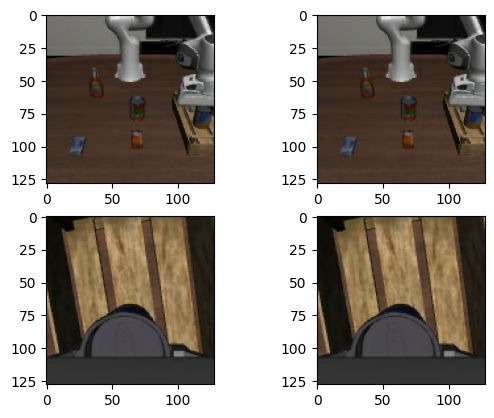

In [4]:
import matplotlib.pyplot as plt
plot_sample = good_sample

print( plot_sample['observation']['image_primary'].shape)
print(plot_sample['next_observation']['image_primary'].shape)

print(plot_sample['observation']['image_secondary'].shape)
print(plot_sample['next_observation']['image_secondary'].shape)

print(plot_sample['observation']['image_wrist'].shape)
print(plot_sample['next_observation']['image_wrist'].shape)

print(plot_sample['observation']['pad_mask_dict'])
print(plot_sample['next_observation']['pad_mask_dict'])

print(plot_sample['observation']['pad_mask'])
print(plot_sample['next_observation']['pad_mask'])



print(plot_sample['observation']['proprio'])
print(plot_sample['next_observation']['proprio'])

print(plot_sample['action'])


print("REWARD: ", plot_sample['reward'], "is_terminal: ", plot_sample['is_terminal'])

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(plot_sample['observation']['image_primary'])
axs[0, 1].imshow(plot_sample['next_observation']['image_primary'])
axs[1, 0].imshow(plot_sample['observation']['image_wrist'])
axs[1, 1].imshow(plot_sample['next_observation']['image_wrist'])
plt.show()







In [5]:
batch.keys()

dict_keys(['absolute_action_mask', 'action', 'dataset_name', 'is_terminal', 'observation', 'reward', 'task'])

In [8]:
batch['reward'].shape

(32, 1)

In [8]:
batch['reward'].shape

(32, 2)

In [18]:
batch['observation'].keys()

dict_keys(['image_primary', 'image_secondary', 'image_wrist', 'pad_mask', 'pad_mask_dict', 'proprio', 'timestep'])

In [28]:
batch['observation']['pad_mask'][0]

array([ True,  True])

In [29]:
batch['observation']['pad_mask_dict'][0]

KeyError: 0

(2, 7)


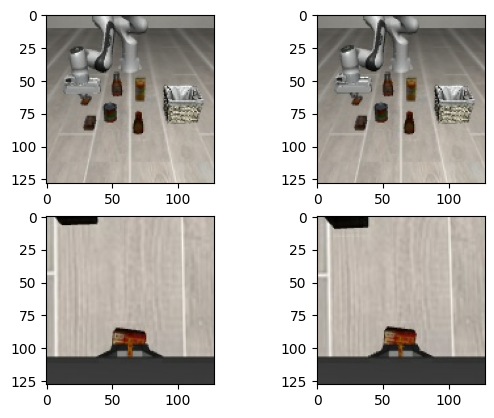

In [6]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(batch['observation']['image_primary'][0][0])
axs[0, 1].imshow(batch['observation']['image_primary'][0][1])
axs[1, 0].imshow(batch['observation']['image_wrist'][0][0])
axs[1, 1].imshow(batch['observation']['image_wrist'][0][1])
print(batch['action'][0].shape)
plt.show()